# Connect data

In [16]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import logging, sys
from importlib import reload
reload(logging) # you need it if want switch logging level


#logging.basicConfig(stream=sys.stdout, level=logging.INFO) # it could make settings for all logger, what we don't want
logging.basicConfig(stream=sys.stdout) # it could make settings for all logger, what we don't want
#logging.disable(sys.maxsize) # desiable logging

logger = logging.getLogger('log')
# logger.setLevel(level=logging.DEBUG)
logger.setLevel(level=logging.INFO)

plt.rc('axes', labelsize = 15)
plt.rc('axes', titlesize= 17)
plt.rc('font', size=12) 
plt.rc('legend', fontsize=15)

data_barrel = np.genfromtxt("/eos/user/k/kropiv/root-files/NI/NN_X_2018D_barrel.csv", delimiter=',')
data_forward = np.genfromtxt("/eos/user/k/kropiv/root-files/NI/NN_X_2018D_forward.csv", delimiter=',')
logger.info("shape of barrel data = " + str(data_barrel.shape))
logger.info("shape of forward data = " + str(data_forward.shape))

INFO:log:shape of barrel data = (1397381, 27)
INFO:log:shape of forward data = (2200174, 27)


# Count vertex if tracks pT > threshold

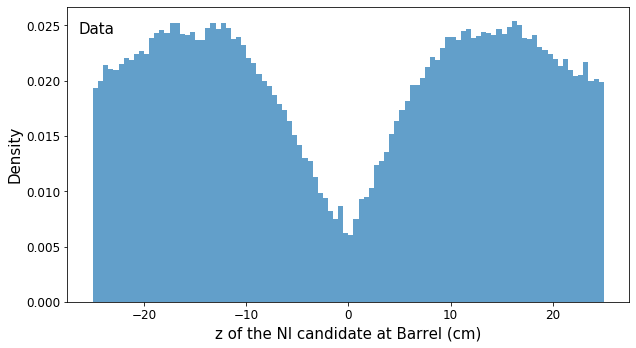

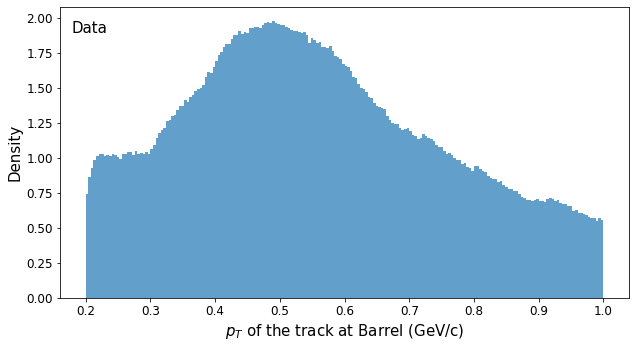

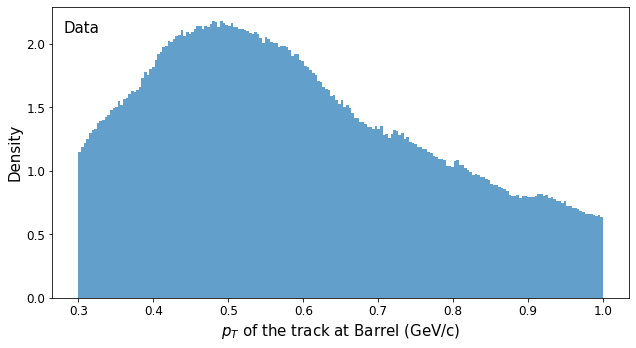

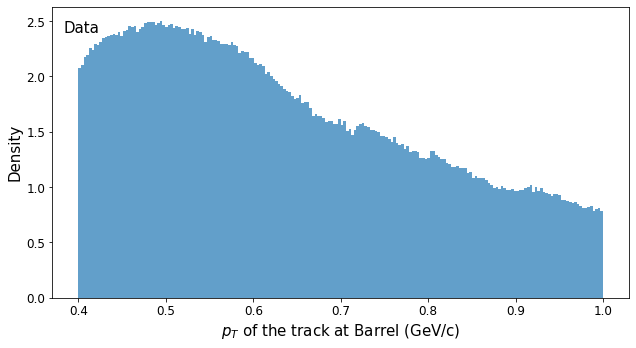

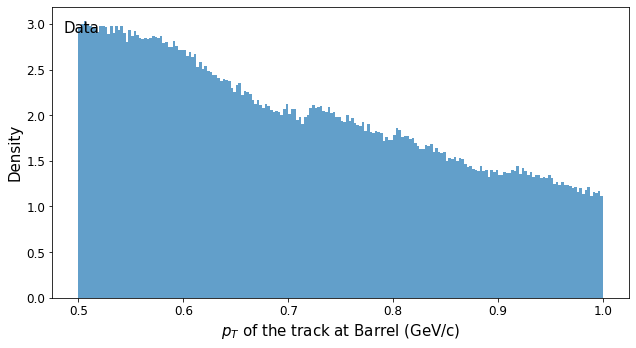

Ratio at Barrel: Track pT > 0.3 = 0.7991514125353071
Ratio at Barrel: Track pT > 0.4 = 0.5821504657641688
Ratio at Barrel: Track pT > 0.5 = 0.3712831360953097


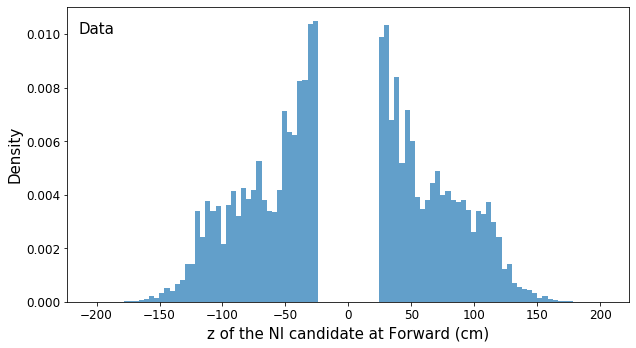

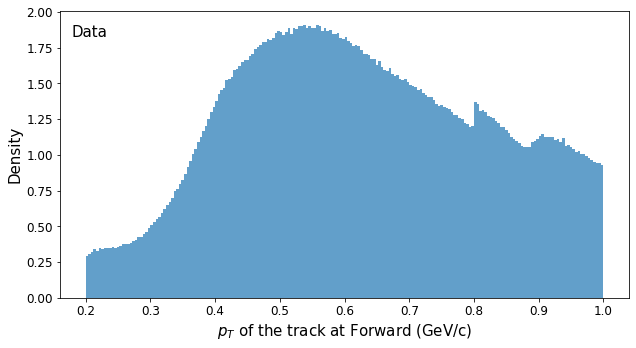

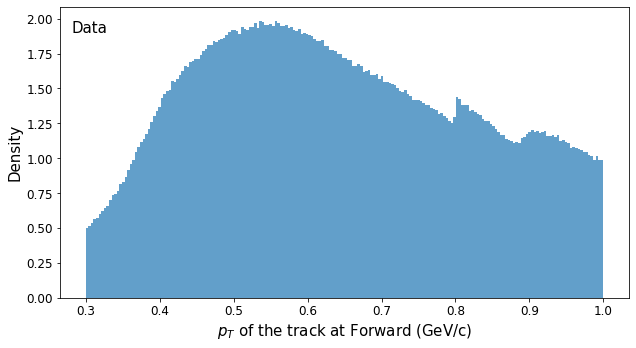

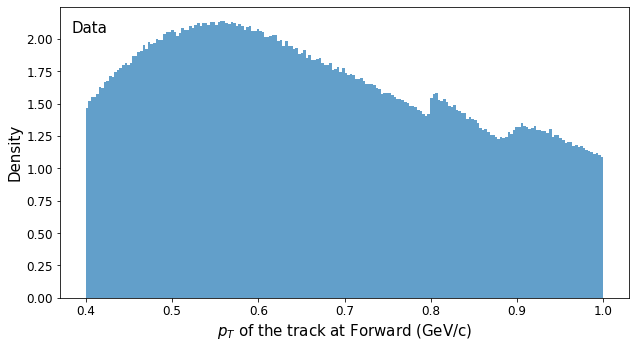

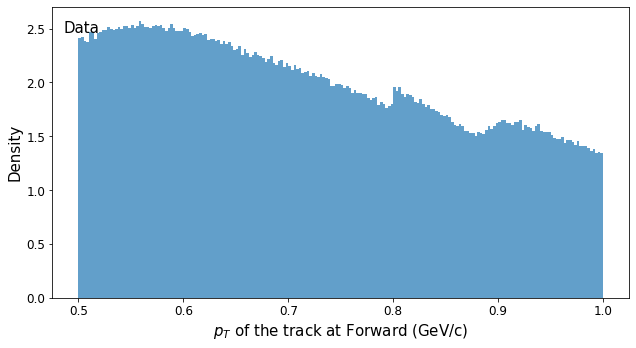

Ratio at Forward: Track pT > 0.3 = 0.9432999390048241
Ratio at Forward: Track pT > 0.4 = 0.8257910510714153
Ratio at Forward: Track pT > 0.5 = 0.6344784548858409


In [17]:
# 3 tracks pt indexes: 6, 7, 8
def PlotPtCut(data, pTCut, Region):
    fig, ax = plt.subplots(figsize=(9,5))
    Count = 0 
    # 3 tracks pt indexes: 6, 7, 8
    index_var = 6 
    numPar = 3
    
    num_bins = 200
    xmin = 0.1
    xmax = 1. 
    
    XpT = data[:, index_var:(index_var+3)]
    XpT = XpT[XpT[:,0]>=pTCut]
    XpT = XpT[XpT[:,1]>=pTCut]
    XpT = XpT[XpT[:,2]>=pTCut]
    XFill = XpT[:, 0]
    # Fill (n >1) parameters Track 1, ... numPar
    if numPar > 1:
        for i_var in range(1,numPar):
            XFill = np.concatenate(([XFill,XpT[:, i_var]]),axis=0)


    Count = len(XFill)/3       
    # track pt
    nS, binsS, patches = ax.hist(XFill[np.logical_and(XFill >xmin, XFill <xmax)], 
                               num_bins, density = True, alpha = 0.7)
    #ax.set_ylim(0., 1.3 * max(np.max(nS),np.max(n)))

    Xtitle = "$p_T$ of the track at "+ Region +" (GeV/c)"
    
    ax.set_xlabel(Xtitle)
    ax.set_ylabel('Density')
    labelData = "Data"

    ax.text(0.02,0.9,labelData, size = 15, transform=ax.transAxes,
            verticalalignment='bottom', horizontalalignment='left')

    fig.tight_layout()
       
    
    plt.savefig('Results/Tracks_pt.pdf')
         
    plt.show()
    return Count 

def PlotNIz(data, Region):
    fig, ax = plt.subplots(figsize=(9,5))
    nS, binsS, patches = ax.hist(data[:,3], 
                                 100, density = True, alpha = 0.7)


    Xtitle = "z of the NI candidate at "+ Region +" (cm)"

    ax.set_xlabel(Xtitle)
    ax.set_ylabel('Density')
    labelData = "Data"

    ax.text(0.02,0.9,labelData, size = 15, transform=ax.transAxes,
            verticalalignment='bottom', horizontalalignment='left')

    fig.tight_layout()

    plt.show()

def Ratio(data, Region):
    PlotNIz(data, Region)    
    nCount_0p2 = PlotPtCut(data, 0.2, Region)
    nCount_0p3 = PlotPtCut(data, 0.3, Region)
    nCount_0p4 = PlotPtCut(data, 0.4, Region)
    nCount_0p5 = PlotPtCut(data, 0.5, Region)

    print("Ratio at "+Region+": Track pT > 0.3 = " +str(nCount_0p3/nCount_0p2))
    print("Ratio at "+Region+": Track pT > 0.4 = " +str(nCount_0p4/nCount_0p2))
    print("Ratio at "+Region+": Track pT > 0.5 = " +str(nCount_0p5/nCount_0p2))

Ratio(data_barrel, "Barrel")
Ratio(data_forward, "Forward")